In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score, learning_curve

# Loading the csv file

In [2]:
file = 'breast-cancer.csv'
df =  pd.read_csv(file)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Encoding categorical features

In [5]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [6]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Function to plot a Learning Curve

In [12]:
def plot_learning_curve(model, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 10)):
    sizes, train_scores, val_scores = learning_curve(model, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1, random_state=42)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(8, 5))
    plt.title(f"Learning Curve for {model}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.grid(True)
    
    plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="b")
    plt.fill_between(sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")
    plt.plot(sizes, train_mean, 'o-', color="b", label="Training Score")
    plt.plot(sizes, val_mean, 'o-', color="g", label="Cross-Validation Score")
    
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

# Model Training and metric Evaluation

KFold Cross-Validation Results (Accuracy):
Mean Accuracy: 0.958, Std: 0.017


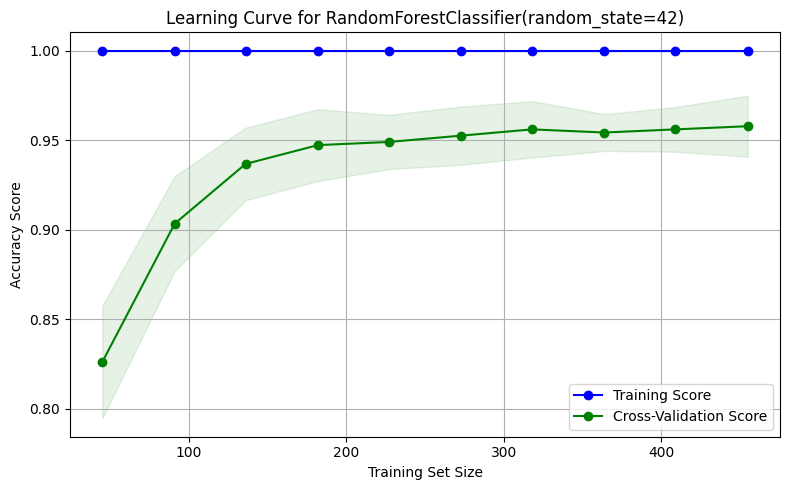

In [13]:
clf = RandomForestClassifier(random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')
print(f"KFold Cross-Validation Results (Accuracy):")
print(f"Mean Accuracy: {scores.mean():.3f}, Std: {scores.std():.3f}")

plot_learning_curve(clf, X, y, kfold)